# Employee attrition Dataset

## Introduction

In an attempt to understand what is employee attrition and why it happens, we will be looking into this dataset and use machine learning Predictive models to predict this variable. Attrition is commonly related to other causes in workplace, like relationships with coworkers, contribution to the work, employee recognition ( as refered to in this link https://www.thebalancecareers.com/top-reasons-why-employees-quit-their-job-1918985)
We will be selecting a couple of variables (out of the 34 listed) basedon the correlation and what we think is relevant to the attrition variable.

In [681]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split #We need this to split the data
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [682]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv') #read the downloaded csv file from Kaggle
# https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
df = df.dropna() #first get rid of rows with empty cells
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [683]:
df.info() #check data type of all columns, 9 are categoral variables
df.isna().sum() #check if there are missing values, no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Interesting Reporting tool >> Check Pandas Profiling Report to get an overview on each variable (install the below before)
In the terminal install this >> pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [684]:
### Unhash the below (its takes time to generate the report)###
#import pandas_profiling
#report = pandas_profiling.ProfileReport(df)
#from IPython.display import display
#display(report)

## Data Cleaning

Its seems that there are couple of columns that we need to drop, like EmployeeCount, over18, StandardHours, and EmployeeNumber, StockOptionLevel,  since those have either the same values, or are not a valid variable that can be used in our analysis. In addition, since we have the Monthly income, then the other variables are redundant and decided that its better to remove (namely MonthlyRate, DialyRate, and HourlyRate)

In [685]:
df.drop(columns = ["EmployeeCount", "Over18", "StandardHours", "StockOptionLevel", "EmployeeNumber", "MonthlyRate", "DailyRate", "HourlyRate"], inplace = True)


## Exploratory Data Analysis

In [686]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Two values of Attrition, Yes and No, so no need to clean this column

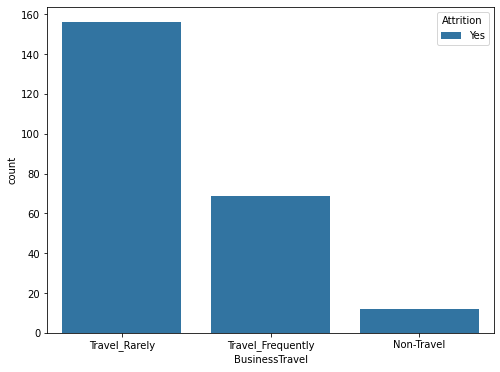

In [687]:
plt.figure(figsize=(8,6))
df1 = df[df["Attrition"] == "Yes" ]

ax = sns.countplot(x='BusinessTravel', data= df1, hue="Attrition")

The ones who Travel Rarely are the people with highlest attrition

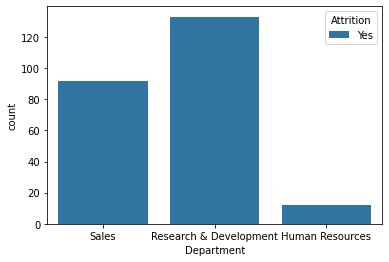

In [688]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Department', data=df1, hue="Attrition")

We notice that the people who worked in "Research & Dev" Depratment mostly had highest Attrition. Could it be related to the department itself? to the manager? to the type of work ?

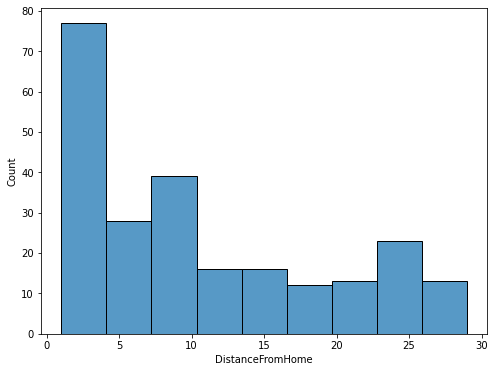

In [689]:
plt.figure(figsize=(8,6))
ax = sns.histplot(x='DistanceFromHome', data=df[ df["Attrition"] == "Yes"])

majority of persons of closest distance to the home are the one with the highest level of attrition

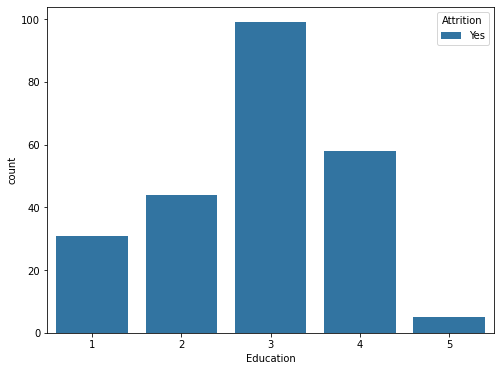

In [690]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Education', data=df[ df["Attrition"] == "Yes"], hue="Attrition")

Most employees with highest attrition are those who had 3 and 4 education levels

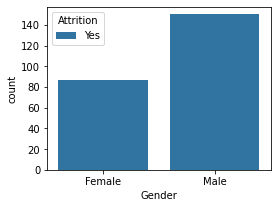

In [691]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x='Gender', data=df[ df["Attrition"] == "Yes"], hue="Attrition")

Male (63%) are more subject to attrition than female (37%)

Let us check the data of persons with positive attrition and negative attrition

In [692]:
df[df['Attrition'] == "Yes"].describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,10.632911,2.839662,2.464135,2.518987,1.637131,2.468354,4787.092827,2.940928,15.097046,3.156118,2.599156,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,8.452525,1.008244,1.169791,0.773405,0.940594,1.118058,3640.210367,2.678519,3.770294,0.363735,1.125437,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2373.000000,1.000000,12.000000,3.000000,2.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,9.000000,3.000000,3.000000,3.000000,1.000000,3.000000,3202.000000,1.000000,14.000000,3.000000,3.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,17.000000,4.000000,4.000000,3.000000,2.000000,3.000000,5916.000000,5.000000,17.000000,3.000000,4.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19859.000000,9.000000,25.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


People who leave the company (attrition = Yes) are of average 33 years old, on average 10km away from work (relatively close), around 6 years on average working, of fewer years in their current position (2 years), with avergae of 4.7K USD monthly income, with low satisfaction at work (avg 2.4)

Let us check if the relationship with their boss is significant to the attrition

In [693]:
fig = px.histogram(df, x="YearsWithCurrManager", color="Attrition", marginal="box")
fig.show()

As seen in the blue graph, employees who resign usually had less time with their manager than others. Now let us check the relation with coworkers

In [694]:
fig = px.box(df, x = 'Attrition', y = 'JobSatisfaction', color = 'Attrition')
fig.update_layout(title = 'Relationships with coworkers')
fig.show()

Most workers of positive attrition are grouped betweeen 1 and 3(max) value of satisfaction, which means that employees with highest attrition are those who have lower job satisfaction (blue above). The ones with not attrition were grouped between 2 and 4 level of satisfaction, which is relevant, more jost satisfaction will lead to lower leaving of the job.

Now let us see if the salary really affects emplpoyee's attrition

In [695]:
fig = px.box(df, x = 'Attrition', y = 'MonthlyIncome', color = 'Attrition')
fig.update_layout(title = 'Relationships with Monthly Income')
fig.show()

It is clear that employees with positive attrition have lower monthly income (median 3.2K compared to those of no attrition 5.2K salary, and have a maximum of 17.3 K salary)

In [696]:
#df = pd.get_dummies(df, columns=['Attrition'])
df = pd.get_dummies(df, columns=['OverTime'])
#df.head()

<AxesSubplot:>

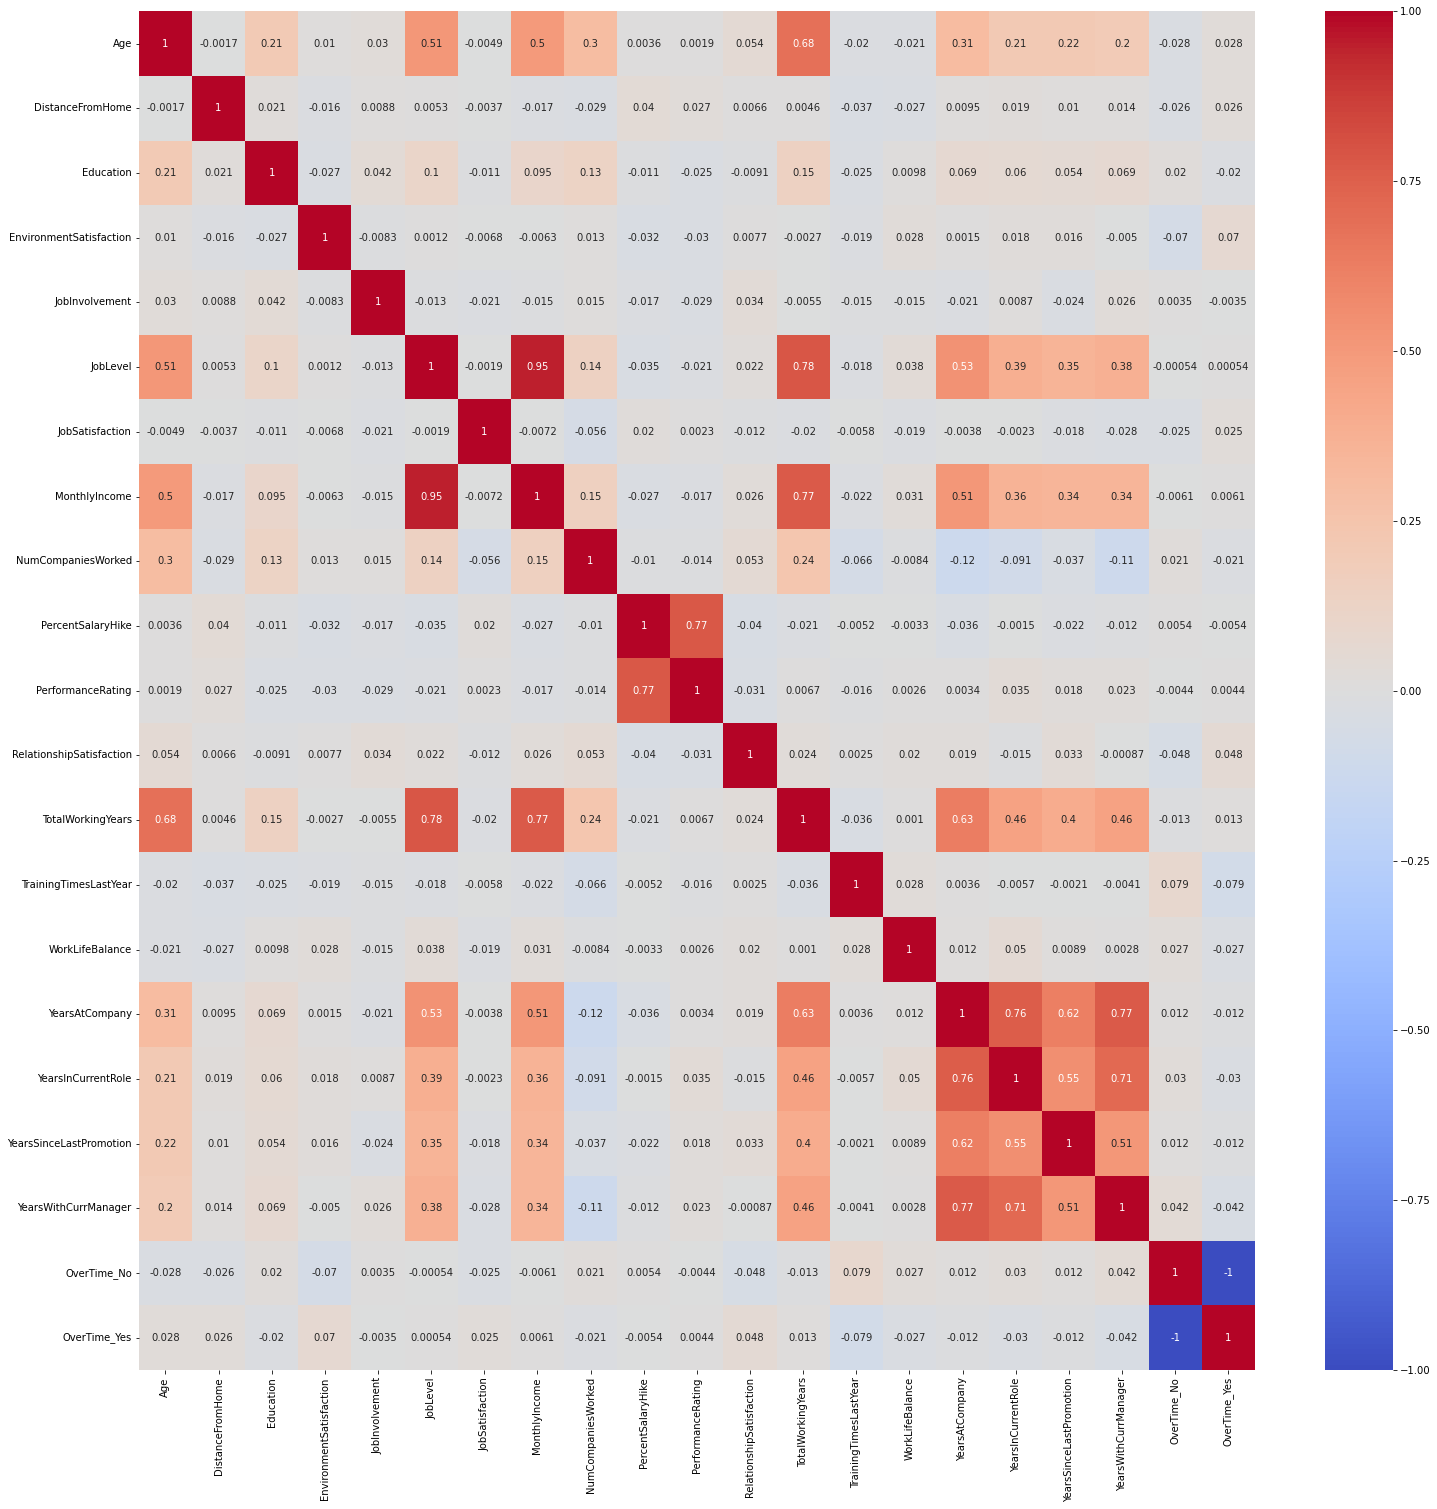

In [697]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

From the above heatmap, we notice the below:

. Age is correlated with several features, including: NumCompaniesWorked, MonthlyIncome, JobLevel, Education

. Attrition has negative correlation with the following features: YearsWithCurrManager, YearsInCurrentRole, YearsAtCompany, TotalWorkingYears, StockOptionLevel, MonthlyIncome, JobLevel, JobInvolvement, EnvironmentSatisfaction, and Age. Attrition is also correlated with OverTime.

. JobLevel is very much correlated with monthly income. It is also highly correlated TotalWorkingYears, i.e. work experience.

. Job satisfaction seems to have no correlation with any of the other features.

. Performance Rating is highly correlated with PercentSalaryHike, i.e. high performance earn better raises.

This will give us a really good indication of what 7 variables we need to pick from the whole dataset to further predict the attrition. Let us choose 7 that are somehow corrolated to the second row the the above corollation matrix (attrition row)

In [698]:
df = df[['Age', 'Attrition','JobInvolvement','OverTime_Yes', 'MonthlyIncome' ,'YearsWithCurrManager', 'TotalWorkingYears', 'TotalWorkingYears']]
df

,Age,Attrition,JobInvolvement,OverTime_Yes,MonthlyIncome,YearsWithCurrManager,TotalWorkingYears,TotalWorkingYears
0,41,Yes,3,1,5993,5,8,8
1,49,No,2,0,5130,7,10,10
2,37,Yes,2,1,2090,0,7,7
3,33,No,3,1,2909,0,8,8
4,27,No,3,0,3468,2,6,6
...,...,...,...,...,...,...,...,...
1465,36,No,4,0,2571,3,17,17
1466,39,No,2,0,9991,7,9,9
1467,27,No,4,1,6142,3,6,6
1468,49,No,2,0,5390,8,17,17


## Predictive Model
<u> K-Nearest</u>

We fill first try the K-Nearst, which is one of the simplest alogithms in machine learning, the idea how this works is to classify new data based on its proximity to k-neighbors (from training data). So if the new data is surrounded by training data that belongs to a certian class or group, it can be concluded that the new data is included in in this class. Bascially KNN work in 5 steps:
<br><br>
1- Determine the K value (number of neighbors)<br>

2- Calculate the disctance to new data (training data)<br>

3- Find the closest K-neighbors from the new data<br> 

4- Predict the new data class<br>

5-Evaluate and tune: calculate the accuracy of the model, and repeat process from step 1 to get more accuracte results

In [699]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.
X = df[['Age', 'JobInvolvement','OverTime_Yes', 'MonthlyIncome' ,'YearsWithCurrManager', 'TotalWorkingYears', 'TotalWorkingYears']] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df['Attrition'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data (70/30), store it into different variables

In [700]:
df.head(10)

,Age,Attrition,JobInvolvement,OverTime_Yes,MonthlyIncome,YearsWithCurrManager,TotalWorkingYears,TotalWorkingYears
0,41,Yes,3,1,5993,5,8,8
1,49,No,2,0,5130,7,10,10
2,37,Yes,2,1,2090,0,7,7
3,33,No,3,1,2909,0,8,8
4,27,No,3,0,3468,2,6,6
5,32,No,3,0,3068,6,8,8
6,59,No,4,1,2670,0,12,12
7,30,No,3,0,2693,0,1,1
8,38,No,2,0,9526,8,10,10
9,36,No,3,0,5237,7,17,17


In [701]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=6) #create a KNN-classifier with 6 neighbors 
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.8253968253968254

In [702]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[362,   2],
       [ 75,   2]], dtype=int64)

In [703]:
#print(classification_report(y_test, y_test_pred))

we can see that this model had an accuracy of 83%.

Let us see how the Random Forest will behave

<u> Random Forest</u>

Random Forst is another machine learning algorith that we will be using here, that builds decision trees on different samples, and takes their majority vote for classification and average in case of regression. The idea is simple, it chooses a random sample from the data set, and each model is generated from the samples (Bootstrap Samples) provided by the Original Data with replacement known as row sampling. Then each model is trained independently which generates results. The final output is based on majority voting after combining the results of all models, a step which involves combining all the results and generating output based on majority voting (known as aggregation). <br>

1- In Random forest n number of random records are taken from the data set having k number of records.<br>

2- Individual decision trees are constructed for each sample.<br>

3- Each decision tree will generate an output.<br>

4- Final output is considered based on Majority Voting or Averaging for Classification and regression respectively.<br>

In [676]:
#importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#initializing the RFC object
rfc = RandomForestClassifier(n_estimators=1000)

#fitting the data
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [677]:
#making the predictions
predictions = rfc.predict(X_test)

In [678]:
#importing some reporting tools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [679]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score

print("The model used is Random Forest classifier")
acc= accuracy_score(y_test,predictions)
print("The accuracy is  {}".format(acc))


The model used is Random Forest classifier
The accuracy is  0.8367346938775511


In [680]:




print('classification report: ')
print('='*40)
print(classification_report(y_test,predictions))
print('\n')
print('confusion matrix: ')
print('='*40)
print(confusion_matrix(y_test,predictions))


classification report: 
              precision    recall  f1-score   support

          No       0.85      0.97      0.91       364
         Yes       0.60      0.19      0.29        77

    accuracy                           0.84       441
   macro avg       0.73      0.58      0.60       441
weighted avg       0.81      0.84      0.80       441



confusion matrix: 
[[354  10]
 [ 62  15]]


we can see that our model did an alright job with an accuracy of 85% which is slightly better than the previous algorithm

## Conclusion
Both models had very similar accuracy. While non-competitive salary, poor work environment or bad relationship with the boss may be reasons for a worker to quit, these are not sufficient reasons for an employee to resign. The attrition could be a combination of multiple factors that may or may not be part of the characteristics of this dataset, but this data could be taked as an indicator on what factors could affect the leaving of employees.